In [0]:
from google.colab import files
uploaded = files.upload()

Saving nihonsea-side-pacificsea-side-jan.csv to nihonsea-side-pacificsea-side-jan.csv


In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('nihonsea-side-pacificsea-side-jan.csv', encoding='SHIFT-JIS', header=1)

# 抜き出す
for a_column in ['秋田', '宮古', '酒田', '石巻', '新潟', '水戸', '銚子']:
  # それぞれ
  # 降水量の合計(mm),降水量の合計(mm),降水量の合計(mm),降水量の合計(mm), 日照時間(時間),日照時間(時間),日照時間(時間),日照時間(時間), 平均風速(m/s),平均風速(m/s),平均風速(m/s),平均蒸気圧(hPa),平均蒸気圧(hPa),平均蒸気圧(hPa),
  # で並んでいて，一つの地点につき，
  #	(空), 現象なし情報, 品質情報, 均質番号, (空), 現象なし情報, 品質情報, 均質番号, (空), 品質情報, 均質番号, (空), 品質情報, 均質番号
  # の(空)以外の場所が余計なので，削除
  for i in range(1, 14, 1):
    # 落とす列の列番号を指定(0~)
    if i in [1, 2, 3, 5, 6, 7, 9, 10, 12, 13]:
      df = df.drop(a_column + '.' + str(i), axis=1)

df = df.drop(1)

# DataFrameの中に欠損値がある場合は，0.0を代わりに入れておく
df = df.fillna(0)
df.head()

,Unnamed: 0,秋田,秋田.4,秋田.8,秋田.11,宮古,宮古.4,宮古.8,宮古.11,酒田,酒田.4,酒田.8,酒田.11,石巻,石巻.4,石巻.8,石巻.11,新潟,新潟.4,新潟.8,新潟.11,水戸,水戸.4,水戸.8,水戸.11,銚子,銚子.4,銚子.8,銚子.11
0,年月,降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均蒸気圧(hPa)
2,1977/1,51.0,72.6,4.4,3.6,6.0,224.3,2.1,2.8,101.0,68.9,4.7,3.9,3.0,203.0,2.3,3.4,151.5,69.6,4.9,4.5,13.0,196.6,1.9,4.0,75.5,150.0,4.0,5.0
3,1978/1,93.5,74.0,5.0,4.5,33.0,173.4,1.8,3.9,163.5,55.8,5.2,4.8,9.5,156.0,2.8,4.5,205.5,40.7,4.2,5.5,13.0,166.5,1.6,4.9,54.0,152.4,4.0,5.8
4,1979/1,113.5,70.7,3.1,4.8,74.0,164.0,1.7,3.9,201.0,63.1,4.8,5.4,32.5,177.5,2.8,4.9,151.5,79.9,3.4,6.2,62.0,194.0,1.3,5.1,79.5,180.5,3.3,6.3
5,1980/1,172.5,66.4,3.7,4.7,55.0,172.4,1.8,3.9,212.0,51.1,4.9,5.1,17.0,179.0,2.9,4.7,225.0,48.3,4.0,5.7,66.5,198.2,2.1,4.9,180.5,173.4,4.2,6.0


In [0]:
# グラフ表示するためにローマ字ラベルを作っておく
#np.arrayはenumerateでは回せないので，　listのままにしておく
city_label_list = (['Akita', 'Miyako', 'Sakata', 'Ishinomaki', 'Niigata', 'Mito', 'Choshi'])

# その要素の有無で0と1の2値で表現される変数を「ダミー変数」と呼ぶ
# 0, 1, 2, 3...などの状態が複数あり，かつその数字が大小の意味を持ってない場合は，カテゴリ変数と呼ぶ
# カテゴリ変数は判別問題などで扱えないので，
# カテゴリ変数で表現している内容を，要素に分けて，要素の有無で表現，つまり複数のダミー変数に直す

# 今回は太平洋側と日本海側の2値なので，ダミー変数：太平洋側が0, 日本海側が1
sea_side_label = np.array([1, 0, 1, 0, 1, 0, 0])

# 選んだ都市の
# average_wind_speed: 1月の平均風速
# daylight_hours: 1月の日照時間
# average_humidity: 1月の平均湿度
# precipitation: 1月の降水量
# として，それぞれ42年分*太平洋側，日本海側の2年ずつを，1つ配列としてくっつける

# 42年分のラベルを繋げておく　(42年分*全部の都市)
city_label_in_repeat = np.repeat(city_label_list, 42)
sea_side_label_in_repeat = np.repeat(sea_side_label, 42)

# データをつなげる
# まず最初に空の配列を作っておいて，
precipitation = np.array([], dtype=np.float)
daylight_hours = np.array([], dtype=np.float)
average_wind_speed = np.array([], dtype=np.float)
average_humidity = np.array([], dtype=np.float)

# 選んだ都市の，1月の平均風速，1月の日照時間，1月の平均湿度，1月の降水量を
# それぞれ1つの配列につなぐ
for i, a_city in enumerate(city_label_list): 
  precipitation = np.concatenate((precipitation, df.iloc[1:, 1+(i*4)]))
  daylight_hours = np.concatenate((daylight_hours, df.iloc[1:, 1+(i*4)+1]))
  average_wind_speed = np.concatenate((average_wind_speed, df.iloc[1:, 1+(i*4)+2]))
  average_humidity = np.concatenate((average_humidity, df.iloc[1:, 1+(i*4)+3]))

# vstackで重ねて，配列の次元を入れ替えて，DataFrameにしておく
df_sea_side_city = pd.DataFrame(np.vstack([city_label_in_repeat, sea_side_label_in_repeat, precipitation.astype(np.float), daylight_hours.astype(np.float), average_wind_speed.astype(np.float), average_humidity.astype(np.float)]).transpose())
# DataFrameの列名をつけておく
df_sea_side_city = df_sea_side_city.rename(columns={0:'都市名', 1:'太平洋側日本海側ダミー変数', 2:'1月の降水量', 3:'1月の日照時間', 4:'1月の平均風速', 5:'1月の平均湿度'})
# DataFrameの冒頭を確認
df_sea_side_city.head()

,都市名,太平洋側日本海側ダミー変数,1月の降水量,1月の日照時間,1月の平均風速,1月の平均湿度
0,Akita,1,51.0,72.6,4.4,3.6
1,Akita,1,93.5,74.0,5.0,4.5
2,Akita,1,113.5,70.7,3.1,4.8
3,Akita,1,172.5,66.4,3.7,4.7
4,Akita,1,64.5,58.8,4.6,4.2


In [0]:
from sklearn.model_selection import train_test_split

y_whole_2d = df_sea_side_city.iloc[:, 1].values.astype(np.float)
x_whole_2d = df_sea_side_city.iloc[:, 2:4].values.astype(np.float)
y_whole_2d = np.ravel(y_whole)
nihon_sea_side_precipation = list([])
pacific_sea_side_precipation = list([])
nihon_sea_side_daylight_hours = list([])
pacific_sea_side_daylight_hours = list([])
for i, sea_side_label in enumerate(y_whole_2d.tolist()):
  if sea_side_label == 0:
    pacific_sea_side_precipation.append(x_whole_2d[i][0])
    pacific_sea_side_daylight_hours.append(x_whole_2d[i][1])
  else:
    nihon_sea_side_precipation.append(x_whole_2d[i][0])
    nihon_sea_side_daylight_hours.append(x_whole_2d[i][1])

x_train_2d, x_test_2d, y_train_2d, y_test_2d = train_test_split(x_whole_2d, y_whole_2d)

from sklearn.svm import LinearSVC
from sklearn import metrics
svm_model = LinearSVC(C=1.0)
svm_model.fit(x_train_2d, y_train_2d)
svm_y_predict_2d = svm_model.predict(x_test_2d)
svm_accuracy_score_2d = metrics.accuracy_score(y_test_2d, svm_y_predict_2d)
print('SVNの正答率', svm_accuracy_score)

# 係数がこの中に入っている．この係数で表される4次元空間の平面で切るとうまく分類できる，という意味
print('分離平面の係数', svm_model.coef_[0])
print('分離平面の切片', svm_model.intercept_[0])

# 分離平面の係数をもうちょっとわかりやすく表示してみる
svm_coef_df = pd.DataFrame([df_sea_side_city.columns[2:4], svm_model.coef_[0]]).T
# DataFrame.Tはnumpyのtransposeに相当し，配列の次元を入れ替える
print(svm_coef_df)

import matplotlib.pyplot as plt
plt.scatter(np.array(pacific_sea_side_precipation, dtype=np.float), np.array(pacific_sea_side_daylight_hours, dtype=np.float), label='Pacific Sea Side Cities')
plt.scatter(np.array(nihon_sea_side_precipation, dtype=np.float), np.array(nihon_sea_side_daylight_hours, dtype=np.float), label='Nihon Sea Side Cities')
plt.xlabel('Precipation')
plt.ylabel('Daylight Hours')

svm_w = svm_model.coef_[0]
svm_a = -1.0 * svm_w[0] / svm_w[1]
svm_xx = np.linspace(0, max(nihon_sea_side_precipation))
svm_yy = svm_a * svm_xx - (svm_model.intercept_[0]) / svm_w[1]
plt.plot(svm_xx, svm_yy, linestyle='solid', label='Linear SVN')

plt.legend()
plt.show()

plt.show()

NameError: ignored

In [0]:
from sklearn.model_selection import train_test_split

# 線形分類は，Xは説明変数多数の行列，Yは0or1（この場合太平洋側か日本海側かのダミー変数）が入った1次元配列を取る
y_whole = df_sea_side_city.iloc[:, 1].values.astype(np.float)
x_whole = df_sea_side_city.iloc[:, 2:].values.astype(np.float)
# yを1次元配列にする
y_whole = np.ravel(y_whole)

# 訓練データとテストデータに分ける
# 実行する度に訓練データとテストデータに選ばれる行がランダムで変わる
x_train, x_test, y_train, y_test = train_test_split(x_whole, y_whole)

In [0]:
# 線形SVMで分類する
from sklearn.svm import LinearSVC
from sklearn import metrics

svm_model = LinearSVC(C=1.0)
svm_model.fit(x_train, y_train)
svm_y_predict = svm_model.predict(x_test)
svm_accuracy_score = metrics.accuracy_score(y_test, svm_y_predict)
print('SVNの正答率', svm_accuracy_score)
# 係数がこの中に入っている．この係数で表される4次元空間の平面で切るとうまく分類できる，という意味
print('分離平面の係数', svm_model.coef_[0])
print('分離平面の切片', svm_model.intercept_[0])

# 分離平面の係数をもうちょっとわかりやすく表示してみる
svm_coef_df = pd.DataFrame([df_sea_side_city.columns[2:], svm_model.coef_[0]]).T
# DataFrame.Tはnumpyのtransposeに相当し，配列の次元を入れ替える
print(svm_coef_df)

SVNの正答率 0.9864864864864865
分離平面の係数 [ 0.01283671 -0.03886594  0.24553589  0.17610955]
分離平面の切片 0.08186901170880292
         0          1
0   1月の降水量  0.0128367
1  1月の日照時間 -0.0388659
2  1月の平均風速   0.245536
3  1月の平均湿度    0.17611


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# 鳥取県境(日本海側)，静岡県石廊崎(太平洋側)の2018年1月のデータを入れてみて，ちゃんと分類できるか検証する．
# 境のデータ 降水量191.5(mm), 日照時間58.1(時間), 平均風速2.6(m), 平均蒸気圧6.3(hPa), 
# 石廊崎のデータ 降水量 93.5(mm), 日照時間188.6(時間), 平均風速6.8(m), 平均蒸気圧6.6(hPa)
sakaiX = np.array([[191.5, 58.1, 2.6, 6.3]], dtype=np.float)
irouzakiX = np.array([[93.5, 188.6, 6.8, 6.6]], dtype=np.float)

print('境の2018年1月のデータから予測した結果', svm_model.predict(sakaiX))
print('石廊崎の2018年1月のデータから予測した結果', svm_model.predict(irouzakiX))

境の2018年1月のデータから予測した結果 [1.]
石廊崎の2018年1月のデータから予測した結果 [0.]


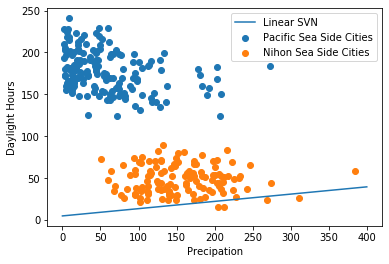

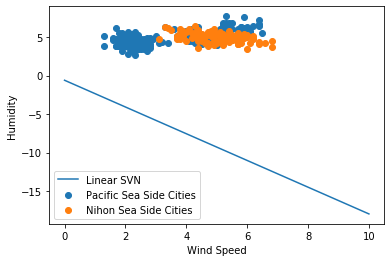

In [0]:
import matplotlib.pyplot as plt

counter = 0
nihon_sea_side_precipation = np.array([], dtype=np.float)
pacific_sea_side_precipation = np.array([], dtype=np.float)
nihon_sea_side_daylight_hours = np.array([], dtype=np.float)
pacific_sea_side_daylight_hours = np.array([], dtype=np.float)
nihon_sea_side_wind_speed = np.array([], dtype=np.float)
pacific_sea_side_wind_speed = np.array([], dtype=np.float)
nihon_sea_side_humidity = np.array([], dtype=np.float)
pacific_sea_side_humidity = np.array([], dtype=np.float)

for index, a_sea_side_label in enumerate(sea_side_label):
  city_precipation_42years = df_sea_side_city.iloc[index*42:(index+1)*42, 2]
  city_daylight_hours_42years = df_sea_side_city.iloc[index*42:(index+1)*42, 3]
  city_wind_speed_42years = df_sea_side_city.iloc[index*42:(index+1)*42, 4]
  city_humidity_42years = df_sea_side_city.iloc[index*42:(index+1)*42, 5]
  if a_sea_side_label == 0:
    pacific_sea_side_precipation = np.concatenate((pacific_sea_side_precipation, city_precipation_42years))
    pacific_sea_side_daylight_hours = np.concatenate((pacific_sea_side_daylight_hours, city_daylight_hours_42years))
    pacific_sea_side_wind_speed = np.concatenate((pacific_sea_side_wind_speed, city_wind_speed_42years))
    pacific_sea_side_humidity = np.concatenate((pacific_sea_side_humidity, city_humidity_42years))
  else:
    nihon_sea_side_precipation = np.concatenate((nihon_sea_side_precipation, city_precipation_42years))
    nihon_sea_side_daylight_hours = np.concatenate((nihon_sea_side_daylight_hours, city_daylight_hours_42years))
    nihon_sea_side_wind_speed = np.concatenate((nihon_sea_side_wind_speed, city_wind_speed_42years))
    nihon_sea_side_humidity = np.concatenate((nihon_sea_side_humidity, city_humidity_42years))

# まず，降水量と日照時間
plt.scatter(pacific_sea_side_precipation.astype(np.float), pacific_sea_side_daylight_hours.astype(np.float), label='Pacific Sea Side Cities')
plt.scatter(nihon_sea_side_precipation.astype(np.float), nihon_sea_side_daylight_hours.astype(np.float), label='Nihon Sea Side Cities')
plt.xlabel('Precipation')
plt.ylabel('Daylight Hours')

# 2つの重みと切片で，線形分離する直線を引く
# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
svm_w = svm_model.coef_[0]
svm_a = -1.0 * svm_w[0] / svm_w[1]
svm_xx = np.linspace(0, 400)
svm_yy = svm_a * svm_xx - (svm_model.intercept_[0]) / svm_w[1]
plt.plot(svm_xx, svm_yy, linestyle='solid', label='Linear SVN')

plt.legend()
plt.show()

# 次に風速と湿度
plt.scatter(pacific_sea_side_wind_speed.astype(np.float), pacific_sea_side_humidity.astype(np.float), label='Pacific Sea Side Cities')
plt.scatter(nihon_sea_side_wind_speed.astype(np.float), nihon_sea_side_humidity.astype(np.float), label='Nihon Sea Side Cities')
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')

svm_a = -1.0 * svm_w[2] / svm_w[3]
svm_xx = np.linspace(0, 10)
svm_yy = svm_a * svm_xx - (svm_model.intercept_[0]) / svm_w[3]
plt.plot(svm_xx, svm_yy, linestyle='solid', label='Linear SVN')

plt.legend()
plt.show()


In [0]:
from sklearn.linear_model import LogisticRegression
# X, Yの訓練データでロジスティック回帰を学習する
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

# 学習済みのモデルにXテストデータをつっこみ，Yを予測し，観測データと比較
log_y_predict = log_model.predict(x_test)
log_accuracy_score = metrics.accuracy_score(y_test, log_y_predict)
print('ロジスティック回帰の正答率:', log_accuracy_score)
# 係数がこの中に入っている．この係数で表される4次元空間の平面で切るとうまく分類できる，という意味
print('分離平面の係数', log_model.coef_[0])
print('分離平面の切片', log_model.intercept_[0])

# 同じく分離平面の係数をもうちょっとわかりやすく表示してみる
log_coef_df = pd.DataFrame([df_sea_side_city.columns[2:], log_model.coef_[0]]).T
print(log_coef_df)

ロジスティック回帰の正答率: 0.9459459459459459
分離平面の係数 [ 0.26298817 -0.18462974  0.25403575 -0.32331834]
分離平面の切片 -3.3614051554580233
         0         1
0   1月の降水量  0.262988
1  1月の日照時間  -0.18463
2  1月の平均風速  0.254036
3  1月の平均湿度 -0.323318


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
sakaiX = np.array([[191.5, 58.1, 2.6, 6.3]], dtype=np.float)
irouzakiX = np.array([[93.5, 188.6, 6.8, 6.6]], dtype=np.float)

print('境の2018年1月のデータから予測した結果', log_model.predict(sakaiX))
print('石廊崎の2018年1月のデータから予測した結果', log_model.predict(irouzakiX))

境の2018年1月のデータから予測した結果 [1.]
石廊崎の2018年1月のデータから予測した結果 [0.]


In [0]:
# 2つの重みと切片で，線形分離する直線を引く
# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
svn2_w = svn_model2.coef_[0]
svn2_a = -1.0 * svn2_w[0] / svn2_w[1]
svn2_yy = svn2_a * xx - (svn_model2.intercept_[0]) / svn2_w[1]
plt.plot(xx, svn2_yy, linestyle='solid', label='Linear SVN')
plt.show()